# Matrices de transformación 3D

Ahora que ya sabemos como manejar transformaciones en 2D, vamos a ver el caso 3D.

Como hemos visto previamente, necesitamos una dimensión más para albergar la operación de traslación (lo que llamábamos **transformaciones afines en coordenadas homogéneas**), así que en nuestro caso, las matrix de identidad tendrá esta forma:

$$
I =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

Así una matriz de traslación vendrá dada por:

$$
T_t =
\begin{pmatrix}
1 & 0 & 0 & t_x \\
0 & 1 & 0 & t_y \\
0 & 0 & 1 & t_z \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

Una de escalado por:

$$
S_s =
\begin{pmatrix}
s_x & 0 & 0 & 0 \\
0 & s_y & 0 & 0 \\
0 & 0 & s_z & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

Y las rotaciones serían más complejas, ya que pueden darse en cada uno de los tres ejes ortogonales que conforman nuestro espacio 3D:

$$
R_{\Theta x} =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & \cos(\theta) & -\sin(\theta) & 0 \\
0 & \sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}
$$

$$
R_{\Theta y} =
\begin{pmatrix}
\cos(\theta) & 0 & \sin(\theta) & 0 \\
0 & 1 & 0 & 0 \\
-\sin(\theta) & 0 & \cos(\theta) & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}
$$

$$
R_{\Theta z} =
\begin{pmatrix}
\cos(\theta) & -\sin(\theta) & 0 & 0 \\
\sin(\theta) & \cos(\theta) & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}
$$



In [1]:
# Importamos las bibliotecas necesarias

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
%matplotlib notebook
%matplotlib inline

Podemos implementar las funciones que creen estas matrices de forma sencilla, para no tener que crearlas a mano cada vez.

In [2]:
def MR_x(theta):
    """
    Devuelve la matriz de rotación 3D alrededor del eje x por un ángulo theta (en radianes).
    """
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    matriz = np.array([
        [1, 0, 0, 0],
        [0, cos_theta, -sin_theta, 0],
        [0, sin_theta, cos_theta, 0],
        [0, 0, 0, 1]
    ])
    return matriz

def MR_y(theta):
    """
    Devuelve la matriz de rotación 3D alrededor del eje y por un ángulo theta (en radianes).
    """
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    matriz = np.array([
        [cos_theta, 0, sin_theta, 0],
        [0, 1, 0, 0],
        [-sin_theta, 0, cos_theta, 0],
        [0, 0, 0, 1]
    ])
    return matriz

def MR_z(theta):
    """
    Devuelve la matriz de rotación 3D alrededor del eje z por un ángulo theta (en radianes).
    """
    cos_theta = np.cos(theta)

    sin_theta = np.sin(theta)
    matriz = np.array([
        [cos_theta, -sin_theta, 0, 0],
        [sin_theta, cos_theta, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])
    return matriz

In [3]:
def MS(sx, sy, sz):
    """
    Devuelve la matriz de escalado 3D con los factores de escala sx, sy y sz.
    """
    matriz = np.array([
        [sx, 0, 0, 0],
        [0, sy, 0, 0],
        [0, 0, sz, 0],
        [0, 0, 0, 1]
    ])
    return matriz

In [4]:
def MT(tx, ty, tz):
    """
    Devuelve la matriz de traslación 3D con los desplazamientos tx, ty y tz.
    """
    matriz = np.array([
        [1, 0, 0, tx],
        [0, 1, 0, ty],
        [0, 0, 1, tz],
        [0, 0, 0, 1]
    ])
    return matriz

Como siempre, crearemos una función para poder representar gráficos 3D también.

In [5]:
def crearRejilla3D(title='$\mathbb{E}^3$', rango=[-3, 3, -3, 3, -3, 3]):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.grid(color='gray', linestyle='--', linewidth=0.25)
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')
    ax.set_title(title)
    ax.set_xlim(rango[0], rango[1])
    ax.set_ylim(rango[2], rango[3])
    ax.set_zlim(rango[4], rango[5])
    ax.plot([0, 0], [0, 0], [rango[0], rango[1]], color='green', linewidth=0.5)
    ax.plot([0, 0], [rango[0], rango[1]], [0, 0], color='blue', linewidth=0.5)
    ax.plot([rango[0], rango[1]], [0, 0], [0, 0], color='red', linewidth=0.5)
    ax.grid(True)
    return fig, ax

Con estas matrices ya podemos probar algunos ejemplos. Vamos a crear una esfera:

Una esfera viene dada por esta ecuación:

$$
P_{\theta,\phi} = (x_{\theta,\phi}, y_{\theta,\phi}, z_{\theta,\phi})

x_{\theta,\phi} = r \cdot \sin \theta \cdot \cos \phi
y__{\theta,\phi} = r \cdot \sin \theta \cdot \cos \phi
z__{\theta,\phi} = r \cdot \cos \theta
$$

Fíjate que es como desplazar un círculo a través de otro círculo en dos ejes ortogonales.

In [6]:
def esfera(resolucion, radio):
    """
    Genera una esfera utilizando dos círculos en dos ejes.
    
    Args:
        resolucion (int): Número de divisiones en la esfera (mayor resolución = más vértices).
        radio (float): Radio de la esfera.
    
    Returns:
        np.array: Matriz 3D con los vértices de la esfera.
    """
    phi = np.linspace(0, 2 * np.pi, resolucion)  # Ángulo azimutal (0 a 2pi)
    theta = np.linspace(0, np.pi, resolucion)  # Ángulo polar (0 a pi)
    phi, theta = np.meshgrid(phi, theta)  # Crea una malla de puntos
    
    # Coordenadas cartesianas de los vértices
    x = radio * np.sin(theta) * np.cos(phi)
    y = radio * np.sin(theta) * np.sin(phi)
    z = radio * np.cos(theta)
    
    # Devuelve los vértices como un array 3D
    return [x.flatten(), y.flatten(), z.flatten()]

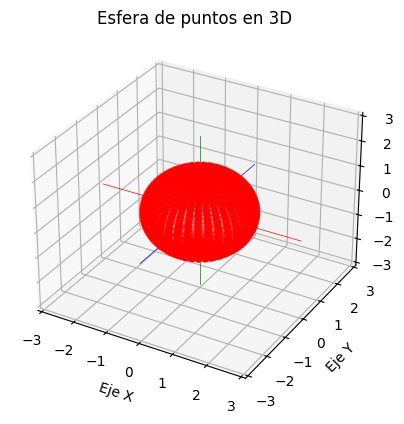

In [7]:
resolucion = 36
radio = 1.5
puntos = esfera(resolucion, radio)

fig, ax = crearRejilla3D("Esfera de puntos en 3D")
ax.scatter(puntos[0], puntos[1], puntos[2], color='red', s=20)
plt.show()

Vamos a hacer un escalado, seguido de una traslación y una rotación:

$$
M = R_\theta \cdot T_t \cdot S_s
$$

In [8]:
M = MR_y(45) @ MT(0.5, 0.5, -0.5) @ MS(2, 2, 2)

print(f"M = \n{M}")

M = 
[[ 1.05064398  0.          1.70180705 -0.16279077]
 [ 0.          2.          0.          0.5       ]
 [-1.70180705  0.          1.05064398 -0.68811276]
 [ 0.          0.          0.          1.        ]]


Vamos a aplicar las transformaciones, pero antes transformaremos los puntos en arrays. Para ello necesitaremos convertir los puntos (que son una lista filas) en columnas, así:

Si tenemos los puntos de esta forma:
```[[x_0, y_0, z_0, 1], [x_1, y_1, z_1, 1], ...]```

vamos a convertirlo en esto:
```[[x_0, x_1, ...], [y_0, y_1, ...], [z_0, z_1, ...], [1, 1, ...]]```





In [9]:
ones = np.ones_like(puntos[0]) # vector de 1
puntos = np.array(np.column_stack((puntos[0], puntos[1], puntos[2], ones)))
trans_puntos = np.transpose(puntos) # trasponemos la matriz 

In [10]:
print("El tamaño de la lista de puntos es", trans_puntos.shape)
print("El tamaño de la matriz M es", M.shape)

El tamaño de la lista de puntos es (4, 1296)
El tamaño de la matriz M es (4, 4)


Ahora realizaremos la operación de transformación. Para ello vamos a calcular $M \cdot P$, siendo $P$ la matriz con todos los puntos.

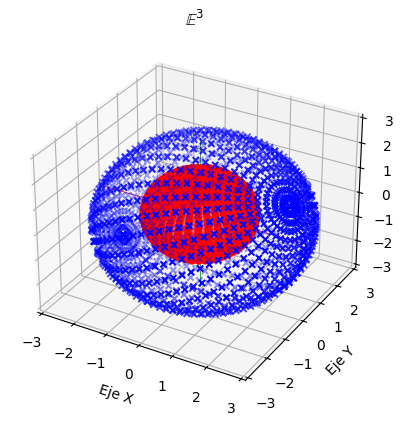

In [11]:
tpuntos = M @ trans_puntos
tpuntos = np.transpose(tpuntos) # trasponemos la matriz para dibujar los puntos

fig, ax = crearRejilla3D()
ax.scatter(puntos[:,0], puntos[:,1], puntos[:, 2], color='red', s=20)
ax.scatter(tpuntos[:,0], tpuntos[:,1], tpuntos[:, 2], color='blue', marker='x', s=20)
plt.show()

Como vemos, las matrices nos pueden ahorrar un trabajo enorme a la hora de modificar los objetos 3D.

Algunos motores gráficos (como por ejemplo [Godot](https://godotengine.org)), dividen la matriz en dos partes, la base (*basis*) y el origen (*origen*).

Esto es así porque la matriz puede descomponerse en dos partes:

1. Por un lado, la matriz que representa la base del espacio tridimensional.
2. Por otro lado, un vector que indica la posición inicial del centro de coordenadas.

En la matriz $H$, podemos ver cada uno de estos elementos:

Como vemos, las matrices nos pueden ahorrar un trabajo enorme a la hora de modificar los objetos 3D.

Algunos motores gráficos (como por ejemplo [Godot](https://godotengine.org)), dividen la matriz en dos partes, la base (*basis*) y el origen (*origen*).

Esto es así porque la matriz puede descomponerse en dos partes:

1. Por un lado, la matriz que representa la base del espacio tridimensional.
2. Por otro lado, un vector que indica la posición inicial del centro de coordenadas.

En la matriz $H$ podemos ver cada uno de estos elementos:

$$
H =
\begin{pmatrix}
a_x & b_x & c_x & o_x \\
a_y & b_y & c_y & o_y \\
a_z & b_z & c_z & o_z \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

Dado que la matriz siempre tiene una fila que es la misma, la única información que necesitaríamos para recomponer $H$ sería:

$$
B =
\begin{pmatrix}
a_x & b_x & c_x \\
a_y & b_y & c_y \\
a_z & b_z & c_z 
\end{pmatrix}
$$

y


$$
O =
\begin{pmatrix}
o_x \\
o_y \\
o_z 
\end{pmatrix}
$$

donde nuestra base vectorial se basaría en tres vectores:

$A = (a_x, a_y, a_z)$

$B = (b_x, b_y, b_z)$

$C = (c_x, c_y, c_z)$

Fíjate que cuando:

$A = (1, 0, 0)$

$B = (0, 1, 0)$

$C = (0, 0, 1)$

$O = (0, 0, 0)$

Tenemos la matriz identidad, la cual define nuestro espacio inicial (una base de tres ejes ortogonales y centrada en origen).

## Matrices de proyección

Hasta ahora hemos utilizado las matrices para realizar operaciones geométricas en 3D, pero una transformación imprescindible en gráficos es la proyección en pantalla. Es decir, pasar de elementos 3D al 2D de nuestro monitor. Para ello hay dos opciones:

1. Realizar una proyección ortogonal.
2. Realizar una proyección en perspectiva.

Una proyección en ortogonal no produce deformación de los objetos al proyectarlos, lo que hace que si dos elementos tienen el mismo tamaño aparezcan de la misma altura sin importar la distancia a la que estén los objetos.

Una proyección en pespectiva trata de simular como vemos, de tal forma que los objetos más lejanos se verían más pequeños que los más cercanos (cosa que no sucede en la proyección ortogonal).

![Proyección en perspectiva y en ortogonal](https://i.pinimg.com/originals/bb/65/a5/bb65a52c40d04c4a07a4a00bcd586d81.jpg "Proyección en perspectiva y en ortogonal")

Una forma de calcular fácilmente la proyección ortogonal es eliminar la componente $z$ de cualquier punto. Mientras que una forma sencilla de calcular una proyección en perspectiva es dividir por la distancia de cada punto a la cámara, que, si no hacemos nada, está ubicada en el centro del mundo, el vector $(0, 0, 0)$.

En ese caso, sería equivalente a dividir las componentes $x$ e $y$ de los puntos por su componente $z$.

Estas matrices de proyección deben multiplicarse al principio de la ecuación, siendo el último paso antes de visualizar los puntos finales.

Vamos a ver un ejemplo:

Nuestra matriz de proyección ortogonal será:

$$
P_o=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0
\end{pmatrix}
$$

mientras que nuestra matriz de proyección perspectiva sería la siguiente:

$$
P_p=
\begin{pmatrix}
1/z & 0 & 0 & 0 \\
0 & 1/z & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0
\end{pmatrix}
$$

Pero esto presenta el problema de que necesitaríamos cambiar la matriz para cada punto que llegue. Más adelante abordaremos este problema, vamos ahora a quedarnos por ahora con la matriz en ortogonal.

### Proyección ortogonal

Las proyecciones ortogonales tienen la propiedad de que los objetos no se deforman en distancia, con lo que la coordenada $z$ es directamente ignorada. Vamos a utilizar P_o para proyectar los puntos.

In [12]:
def P_o():
    """
    Devuelve la matriz de proyección ortogonal.
    """
    matriz = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0]
    ])
    return matriz


Vamos a proyectar los puntos que teníamos en nuestra pantalla 2D, para ello usaremos una función que nos permita dibujar en 2D:

In [13]:
def crearRejilla(title='$\mathbb{E}^2', rango=[-3, 3, -3, 3]):
    fig, ax = plt.subplots()
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title(title)
    plt.axis(rango)  # Define los límites de los ejes [xmin, xmax, ymin, ymax]
    plt.grid(True)  # Mostrar cuadrícula
    return fig,ax

Básicamente calcularemos $P_o \cdot P$ siendo $P$ la matriz de puntos que teníamos previamente.

In [14]:
puntos_2D = P_o() @ trans_puntos
tpuntos_2D = np.transpose(puntos_2D) # trasponemos la matriz para dibujar los puntos
print("El tamaño de la matriz P es", tpuntos_2D.shape)

El tamaño de la matriz P es (1296, 4)


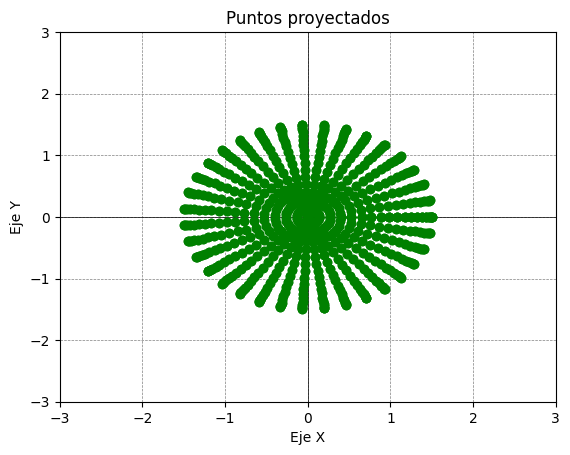

In [15]:
fig, ax = crearRejilla("Puntos proyectados")
plt.plot(tpuntos_2D[:,0], tpuntos_2D[:,1], 'go')
plt.show()

Podemos aplicar cualquier transformación 3D que queramos antes de proyectar los puntos, por ejemplo:
$$
P'= P_o \cdot T_t \cdot P
$$

Fíjate que hasta llegar a $P_o$, la matriz es $4 \times 4$.

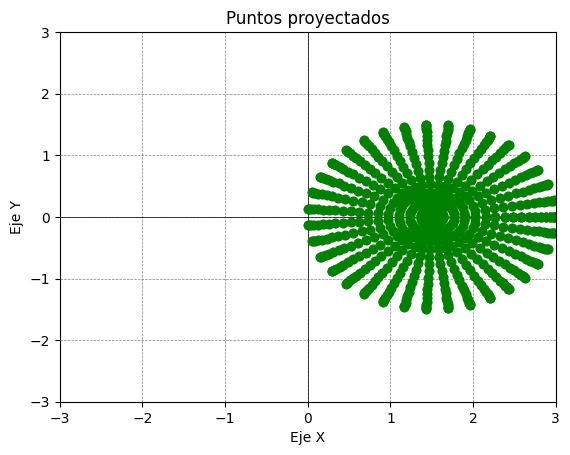

In [16]:
puntos_2D = P_o() @ MT(1.5, 0, 0) @ trans_puntos
tpuntos_2D = np.transpose(puntos_2D) # trasponemos la matriz para dibujar los puntos

fig, ax = crearRejilla("Puntos proyectados")
plt.plot(tpuntos_2D[:,0], tpuntos_2D[:,1], 'go')
plt.show()

Fíjate como este movimiento se puede interpretar de dos formas:

1. Por un lado se puede interpretar que hemos desplazado el objeto a la derecha 1.5 unidades.
2. Por otro lado se puede interpretar que hemos desplazado la cámara a la izquierda 1.5 unidades.

Efectivamente, los movimientos de cámara son inversos a los movimientos de los objetos y podríamos componerlos en la matriz de proyección:

$M_{P_o} = P_o \cdot T_-t \cdot S_1/s$ nos podría indicar una cámara que primero escala de $s$ unidades (hace zoom), y luego se desplaza $t$ unidades, para finalmente realizar una proyección.

### Matriz de perspectiva

Las matrices $4 \times 4$ afines en realidad se definen como matrices homeomórficas, lo que significa que están pensadas para vectores de 4 dimensiones, tal y como hemos visto previamente, donde la última coordenada suele fijarse a 1. Por eso, hasta ahora nuestros puntos tenían esta forma $\mathbf{P} = (x, y, z, 1)$.

En realidad, los vectores de puntos se generalizan usando una cuarta componente $w$:

$\mathbf{P} = (x, y, z, w)$

El punto final en 3 dimensiones se calcula dividiendo por $w$:

$\mathbf{P} = (x/w, y/w, z/w)$

Cuando $w = 1$ es equivalente a ignorar la cuarta dimension. Sin embargo, para las proyecciones nos puede venir bien este valor, ya que permite realizar la división que nos haría falta en la matriz de proyección en perspectiva.

Si cambiamos $P_p$ con esta forma, resolveremos el problema que comentamos de tener que cambiar la matriz para cada punto:

$$
P_p=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0
\end{pmatrix}
$$

Si multiplicamos por el punto $\mathbf{P}$ tenemos:

$$
P' = P_p \cdot P =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0
\end{pmatrix}
\cdot
\begin{pmatrix}
x \\
y \\
z \\
1
\end{pmatrix}
=
\begin{pmatrix}
x \\
y \\
0 \\
z
\end{pmatrix}
$$

recordemos, que luego habrá que dividir la última componente y se nos quedará el punto como:

$\mathbf{P}' = (x/z, y/z, 0/z) = (x/z, y/z, 0)$

que es justo lo que buscamos.

Para implementarlo, primero construiremos la función con la matriz de proyección en perspectiva:

In [17]:
def P_p():
    """
    Devuelve la matriz de proyección en perspectiva.
    """
    matriz = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 1, 0]
    ])
    return matriz


Ya podemos utilizarla de forma análoga a la proyección ortogonal: $P_p \cdot P$ siendo $P$ la matriz de puntos que teníamos previamente.

In [18]:
puntos_2D = P_p() @ trans_puntos

Y a la hora de dibujar, no se nos olvide dividir por la última componente del vector ($w$):

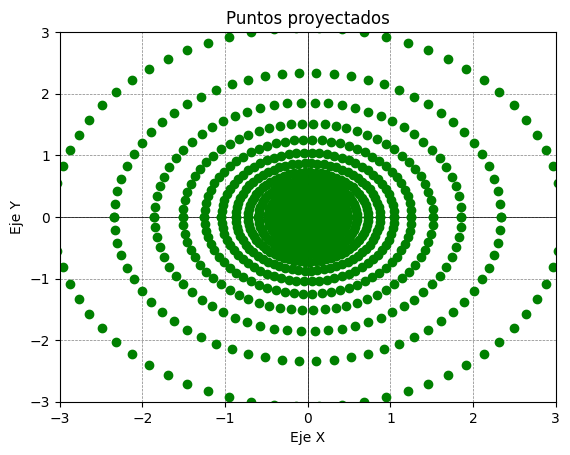

In [19]:
fig, ax = crearRejilla("Puntos proyectados")
tpuntos_2D = np.transpose(puntos_2D) # trasponemos la matriz para dibujar los puntos

plt.plot(tpuntos_2D[:,0]/tpuntos_2D[:,3], tpuntos_2D[:,1]/tpuntos_2D[:,3], 'go')
plt.show()

Fíjate como hemos tenido que cambiar los valores de profundidad para que nunca haya divisiones por 0. Obviamente, la matriz puede mejorarse.

Aquí tienes un [tutorial](https://dasilvagf.github.io/posts/2017/11/deriving-the-perspective-projection-matrix/) para mejora la matriz de transformación de proyección en perspectiva.

Vamos a cambiar la función de proyección en perspectiva para hacer una pequeña animación para ver unas rotaciones 3D sin preocuparnos por las divisiones entre 0:

$$
P_p = 
\begin{pmatrix}
\frac{\cot(\frac{\theta_h}{2})}{\alpha} & 0 & 0 & 0 \\
0 & \cot(\frac{\theta_h}{2}) & 0 & 0 \\
0 & 0 & \frac{f}{f-n} & 1 \\
0 & 0 & -\frac{fn}{f-n}  & 0
\end{pmatrix}
$$

En esta matriz:

- $\theta_h$: Representa el ángulo de apertura horizontal de la proyección, comúnmente conocido como el "campo de visión horizontal". Determina cuánto se extiende la vista desde el punto de vista de la cámara hacia los lados en el plano horizontal.
- $\alpha$: Este parámetro representa el *aspect ratio* o la relación de aspecto de la imagen proyectada. La relación de aspecto es la proporción entre el ancho y la altura de la imagen.
- $f$: Este parámetro representa el plano trasero de la cámara (*far*).
- $n$: Este parámetro suele representar la distancia al plano cercano de la cámara (*near*).


In [20]:
def P_p(apertura=45, aspecto=1, near=0.2, far=200):
    """
    Devuelve la matriz de proyección en perspectiva.
    """
    apertura = apertura * np.pi / 180
    c = 1 / np.tan(apertura/2) # cot(x) = 1/tan(x)
    f = far/(far-near)
    fn = -(far*near)/(far-near)
    matriz = np.array([
        [c/aspecto, 0, 0, 0],
        [0, c, 0, 0],
        [0, 0, f, 1],
        [0, 0, fn, 0]
    ])
    return matriz

Ahora creamos las funciones necesarias para animar:

In [21]:
def crearAnim():
    fig, ax = plt.subplots()
    return fig, ax

def dibEjes(title='$\mathbb{E}^2', rango=[-5, 5, -5, 5]):
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title(title)
    plt.axis(rango)  # Define los límites de los ejes [xmin, xmax, ymin, ymax]
    plt.grid(True)  # Mostrar cuadrícula


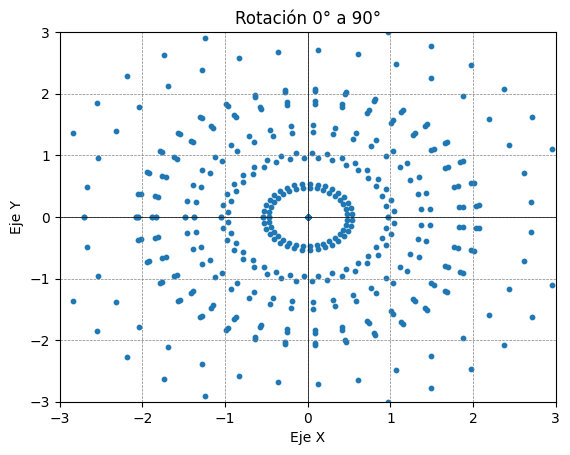

In [22]:
fig,ax = crearAnim()

def update(frame):
    global puntos_persp
    ax.clear()
    dibEjes("Rotación 0° a 90°", [-3, 3, -3, 3])
    puntos_persp = P_p() @ MR_y(frame*0.01) @ trans_puntos
    puntos_persp /= puntos_persp[3] / puntos_persp[2]
    puntos_persp = np.transpose(puntos_persp) # trasponemos la matriz para dibujar los puntos
    scat = ax.scatter(puntos_persp[:, 0], puntos_persp[:, 1], s=10)
    return scat,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 360), blit=False)
ani.save("rotacion_perspectiva_no_culling.mp4")

Fíjate que ahora quedaría eliminar los puntos que están tras la cámara, es decir, aquellos que caen por detrás del plano trasero de la cámara (*near plane*).

El resultado que veríamos serían los puntos rotando, y la cámara estaría en el interior de la esfera.

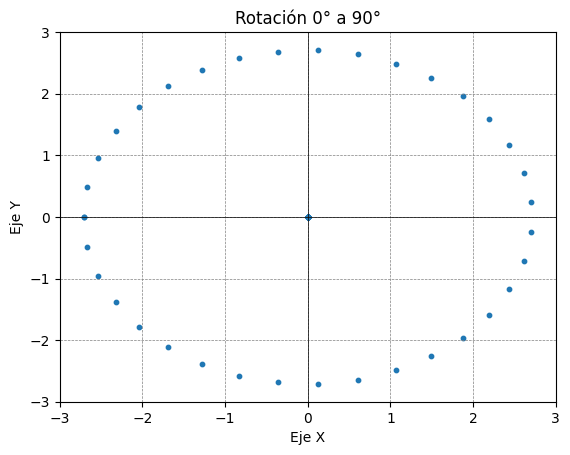

In [23]:
fig,ax = crearAnim()

def update2(frame):
    global puntos_persp
    ax.clear()
    dibEjes("Rotación 0° a 90°", [-3, 3, -3, 3])
    P = MR_y(frame*0.01) @ trans_puntos # Matriz de modelo
    filtrados = P[:, P[2] >= 0.2] # filtramos todos los puntos detrás del near plane
    puntos_persp = P_p() @ filtrados # Matriz de proyección
    puntos_persp /= puntos_persp[3] / puntos_persp[2]
    puntos_persp = np.transpose(puntos_persp) # trasponemos la matriz para dibujar los puntos
    scat = ax.scatter(puntos_persp[:, 0], puntos_persp[:, 1], s=10)
    return scat,

ani = FuncAnimation(fig, update2, frames=np.linspace(0, 360), blit=False)
ani.save("rotacion_perspectiva_culling.mp4")

------

Autor: **Germán Arroyo**

[Creative Commons BY 4.0](https://creativecommons.org/licenses/by/4.0/) ![](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)